### Лабораторная работа №1

1.	Любым удобным вам образом получите TLE аппарата **NOAA 19**

In [43]:
! pip install pyorbital
tle_file = open('noaa19.txt', 'r')

FileNotFoundError: [Errno 2] No such file or directory: 'noaa19.txt'

2.	За положение антенны-наблюдателя для простоты проверки работ возьмем одинаковые координаты

In [5]:
# observer coordinates in degrees
obs_lat, obs_long, obs_alt = 55.75, 37.62, 0.1

3. Интересуемый временной диапазон тоже зададим сразу

In [2]:
from datetime import datetime, timedelta

start, end = datetime.now(), datetime.now() + timedelta(days=1)

print("Интересуемый диапазон: c {} до {}".format(start.strftime("%d.%m.%Y %H:%M:%S"), end.strftime("%d.%m.%Y %H:%M:%S")))

Интересуемый диапазон: c 22.03.2022 19:06:25 до 23.03.2022 19:06:25


**Если вам требуются координаты или даты в другом формате - конвертацию делать НЕ запрещено**

4. Рассчитайте положение аппарата в заданном временном диапазоне (минутного шага достаточно)<br>**Чтобы далее отобразить получившиеся координаты, сохраните их в список `ecis`**

In [6]:
# Ваш код
import numpy as np
import matplotlib.pyplot as plt
from pyorbital.orbital import Orbital
from pyorbital import tlefile
import pyorbital.orbital as p

a, b = 6378.137, 6356.7523142
line1 = '1 33591U 09005A   22080.16248398  .00000088  00000-0  72929-4 0  9997'
line2 = '2 33591  99.1596 112.3992 0014839  77.4766 282.8064 14.12539384675986'
sat = Orbital('NOAA 19', line1=line1, line2=line2)
j = start
ecis = []
while j <= end:
        tmp = sat.get_position(j, normalize=False)
        ecis.append(tmp[0])
        j += timedelta(minutes=1)
j = end
tmp = sat.get_position(j, normalize=False)
ecis.append(tmp[0])
print(ecis)

[array([-2308.16890979,  6260.38558583,  2762.26218035]), array([-2173.28948224,  6116.49297307,  3162.33753581]), array([-2030.12779344,  5949.29081304,  3550.33091133]), array([-1879.22859873,  5759.41386978,  3924.75848136]), array([-1721.16653234,  5547.5842957 ,  4284.18850001]), array([-1556.54384007,  5314.60875646,  4627.24689814]), array([-1385.98800544,  5061.37521783,  4952.62262799]), array([-1210.14928087,  4788.84941278,  5259.07273406]), array([-1029.69813622,  4498.07100831,  5545.4271311 ]), array([-845.3226366 , 4190.14949238, 5810.59307255]), array([-657.72576134, 3866.25980202, 6053.5592949 ]), array([-467.62267598, 3527.63771407, 6273.39982581]), array([-275.73796856, 3175.57502005, 6469.27744569]), array([ -82.80286129, 2811.41450662, 6640.44679454]), array([ 110.4475918 , 2436.5447629 , 6786.25711743]), array([ 303.27731093, 2052.39483541, 6906.15464362]), array([ 494.95199082, 1660.42875109, 6999.68459553]), array([ 684.74188559, 1262.13992811, 7066.49282492]), 

5. Отобразим получившиеся координаты

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axis']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<IPython.core.display.Javascript object>


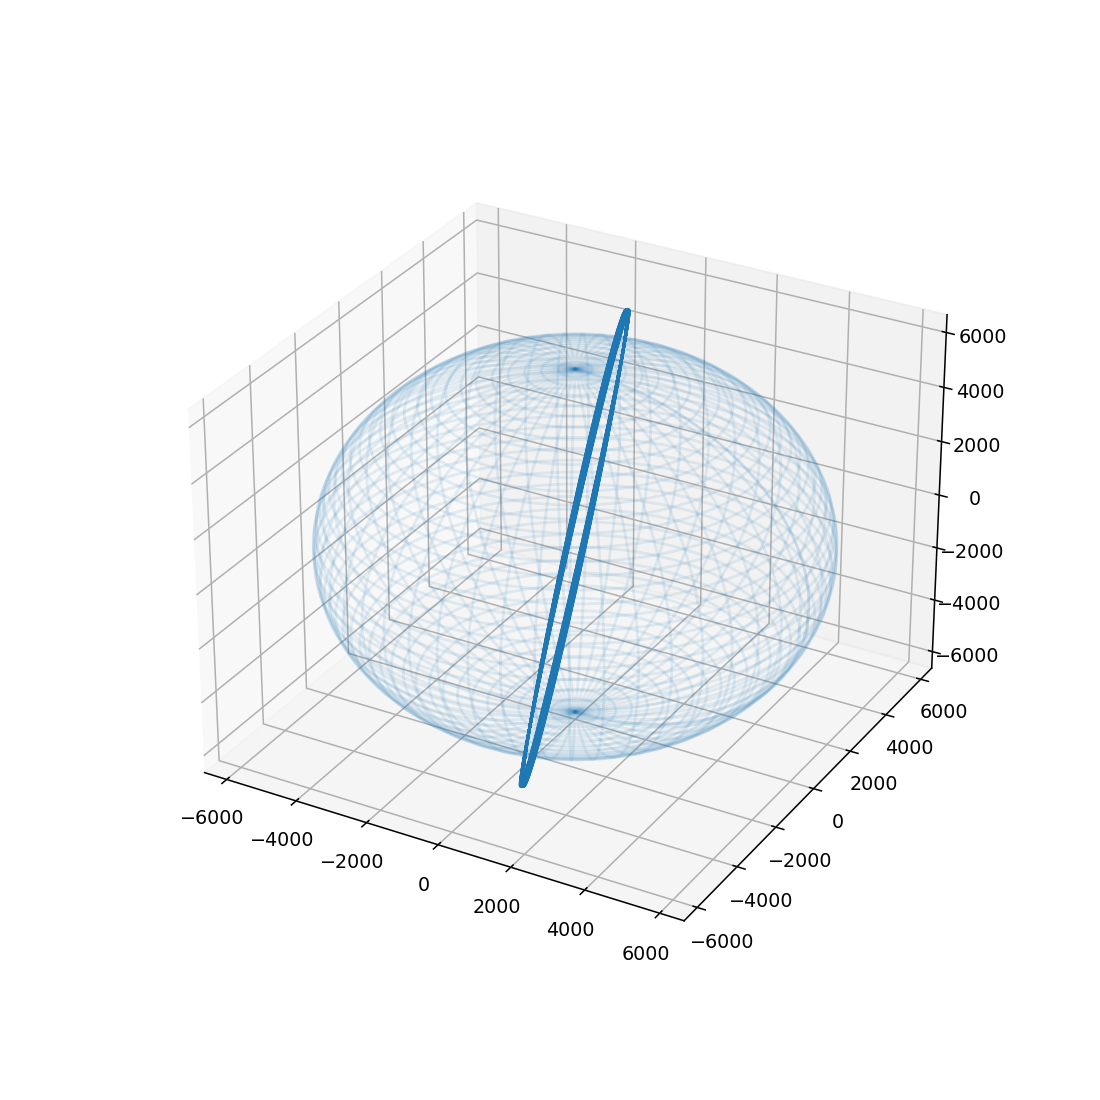

In [7]:
%pylab notebook

from mpl_toolkits.mplot3d import axes3d

a, b = 6378.137, 6356.7523142

ecis = np.array(ecis)
x, y, z = ecis[:, 0], ecis[:, 1], ecis[:, 2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)

rx, ry, rz = a, a, b
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

ax.plot_wireframe(x, y, z, alpha=0.1)


max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

6. Получите прогноз видимости аппарата для антенны-наблюдателя (то есть посчитайте и выведите, в какие диапазоны времени антенна «видит» аппарат)

In [38]:
# Ваш код
passes = sat.get_next_passes(start, 24, obs_long, obs_lat, obs_alt)

print(passes[0])
print(len(passes))

(datetime.datetime(2022, 3, 22, 19, 12, 47, 100557), datetime.datetime(2022, 3, 22, 19, 19, 32, 596774), datetime.datetime(2022, 3, 22, 19, 16, 9, 399602))
10


7. В промежутки времени, когда аппарат «виден» для антенны, посчитайте требуемые для связи углы азимута и элевации в каждый момент времени

<IPython.core.display.Javascript object>


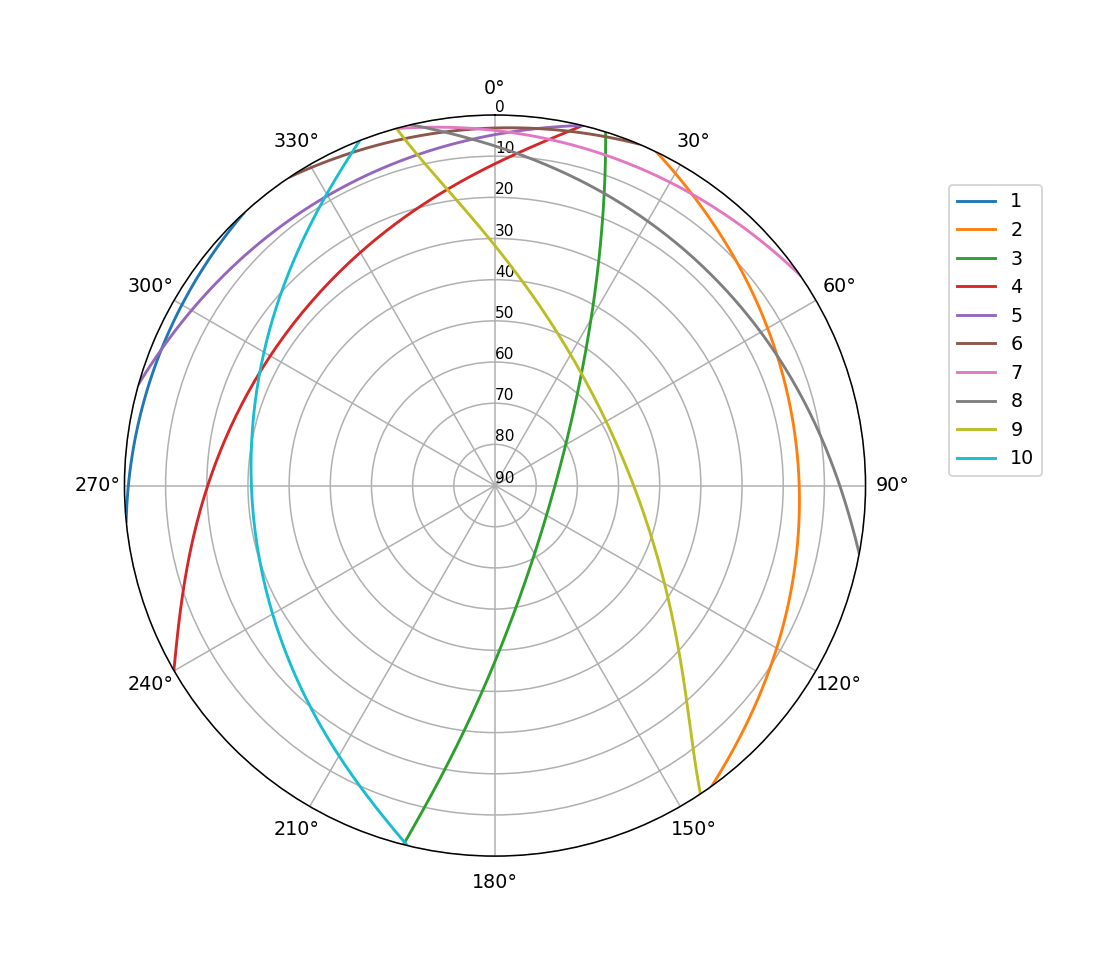

In [39]:
# Ваш код
fig, ax = plt.subplots(figsize=(8, 7), dpi=100, subplot_kw={'projection': 'polar'})


index = 1
for i in passes:
    az, el = [], []
    j = i[0]
    while j <= i[1]:
        tmp = sat.get_observer_look(j, obs_long, obs_lat, obs_alt)
        az.append(tmp[0])
        el.append(tmp[1])
        j += timedelta(seconds=5)
    tmp = sat.get_observer_look(i[1], obs_long, obs_lat, obs_alt)
    az.append(tmp[0])
    el.append(tmp[1])
    ax.plot(np.array(az) / 180 * np.pi, np.array(el), label=str(index))
    index += 1
    
ax.set_rlim(90, 0)
ax.set_rlabel_position(0)
ax.yaxis.set_tick_params(labelsize=8)
ax.set_theta_direction(-1)
ax.grid(True)
ax.set_theta_zero_location('N')
ax.set_thetagrids(np.arange(0.0, 360.0, 30.0))
angle = np.deg2rad(0)
ax.legend(loc="lower left", bbox_to_anchor=(.6 + np.cos(angle)/2, .5 + np.sin(angle)/2))
fig.subplots_adjust(left=0.0)
plt.show()

8. Отобразите на графике в полярных координатах азимут-элевация получившиеся углы.<br>Полярным радиусом в вашей системе будет угол элевации (90 градусов по элевации - центр полярной сетки)

In [ ]:
# Ваш код
